In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
df=pd.read_csv('Traffic.csv')

In [ ]:
df2=df
df.head()

,Date,Day of the week,CarCount,BikeCount,BusCount,TruckCount,Total,Traffic Situation,iST,HH,MM,SS
0,10,5,31,0,4,4,39,low,AM,12,0,0
1,10,5,49,0,3,3,55,low,AM,12,15,0
2,10,5,46,0,3,6,55,low,AM,12,30,0
3,10,5,51,0,2,5,58,low,AM,12,45,0
4,10,5,57,6,15,16,94,normal,AM,1,0,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2976 entries, 0 to 2975
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Time               2976 non-null   object
 1   Date               2976 non-null   int64 
 2   Day of the week    2976 non-null   object
 3   CarCount           2976 non-null   int64 
 4   BikeCount          2976 non-null   int64 
 5   BusCount           2976 non-null   int64 
 6   TruckCount         2976 non-null   int64 
 7   Total              2976 non-null   int64 
 8   Traffic Situation  2976 non-null   object
dtypes: int64(6), object(3)
memory usage: 209.4+ KB


In [ ]:
df.describe()

,Date,CarCount,BikeCount,BusCount,TruckCount,Total
count,2976.000000,2976.000000,2976.000000,2976.000000,2976.000000,2976.000000
mean,16.000000,68.696573,14.917339,15.279570,15.324933,114.218414
std,8.945775,45.850693,12.847518,14.341986,10.603833,60.190627
min,1.000000,6.000000,0.000000,0.000000,0.000000,21.000000
25%,8.000000,19.000000,5.000000,1.000000,6.000000,55.000000
50%,16.000000,64.000000,12.000000,12.000000,14.000000,109.000000
75%,24.000000,107.000000,22.000000,25.000000,23.000000,164.000000
max,31.000000,180.000000,70.000000,50.000000,40.000000,279.000000


In [ ]:
df[['time','iST']] = df['Time'].str.split(' ', expand=True)

In [ ]:
df.head(1)

,Time,Date,Day of the week,CarCount,BikeCount,BusCount,TruckCount,Total,Traffic Situation,time,iST
0,12:00:00 AM,10,Tuesday,31,0,4,4,39,low,12:00:00,AM


In [ ]:
df[['HH', 'MM', 'SS']] = df['time'].str.split(':', expand=True)

df[['HH', 'MM', 'SS']] = df[['HH', 'MM', 'SS']].apply(pd.to_numeric)

In [ ]:
df.head()

,Time,Date,Day of the week,CarCount,BikeCount,BusCount,TruckCount,Total,Traffic Situation,time,iST,HH,MM,SS
0,12:00:00 AM,10,Tuesday,31,0,4,4,39,low,12:00:00,AM,12,0,0
1,12:15:00 AM,10,Tuesday,49,0,3,3,55,low,12:15:00,AM,12,15,0
2,12:30:00 AM,10,Tuesday,46,0,3,6,55,low,12:30:00,AM,12,30,0
3,12:45:00 AM,10,Tuesday,51,0,2,5,58,low,12:45:00,AM,12,45,0
4,1:00:00 AM,10,Tuesday,57,6,15,16,94,normal,1:00:00,AM,1,0,0


In [ ]:
df.drop('Time',axis=1,inplace=True)

In [ ]:
df.drop('time',axis=1,inplace=True)

In [ ]:
df.head()

,Date,Day of the week,CarCount,BikeCount,BusCount,TruckCount,Total,Traffic Situation,iST,HH,MM,SS
0,10,Tuesday,31,0,4,4,39,low,AM,12,0,0
1,10,Tuesday,49,0,3,3,55,low,AM,12,15,0
2,10,Tuesday,46,0,3,6,55,low,AM,12,30,0
3,10,Tuesday,51,0,2,5,58,low,AM,12,45,0
4,10,Tuesday,57,6,15,16,94,normal,AM,1,0,0


In [ ]:
df.isnull().sum()

Date                 0
Day of the week      0
CarCount             0
BikeCount            0
BusCount             0
TruckCount           0
Total                0
Traffic Situation    0
iST                  0
HH                   0
MM                   0
SS                   0
dtype: int64

In [ ]:
df.size

35712

<Axes: >

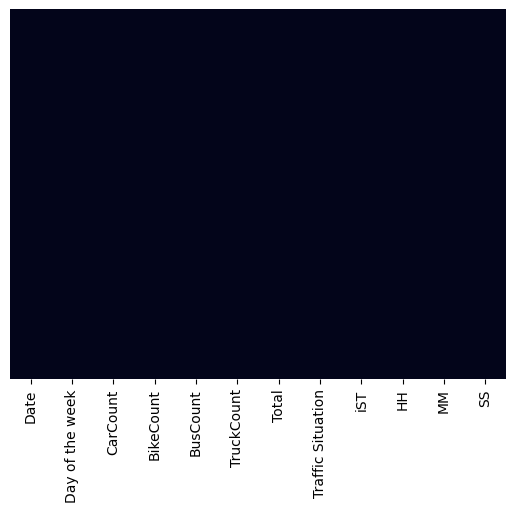

In [ ]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False)

In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
Le=LabelEncoder()

In [ ]:
df['Day of the week']=Le.fit_transform(df['Day of the week'])
df['iST']=Le.fit_transform(df['iST'])

In [ ]:
df3=df.drop('Traffic Situation',axis=1)

In [ ]:
df3=df3.drop('iST',axis=1)

<Axes: >

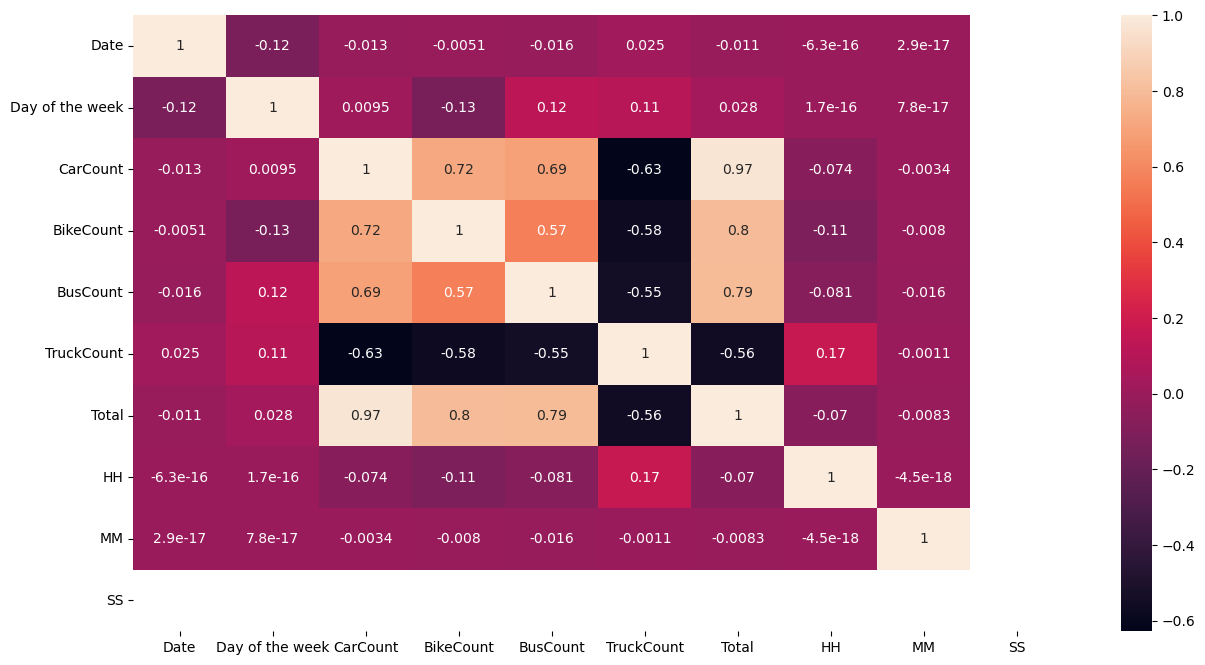

In [ ]:
plt.figure(figsize=(15,8))
sns.heatmap(df3.corr(),annot=True)

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X=df.drop('Traffic Situation',axis=1)
y=df['Traffic Situation']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

# Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
logmodel=LogisticRegression()

In [ ]:
logmodel.fit(X_train,y_train)

C:\Users\VIKAS\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [ ]:
lr_predict=logmodel.predict(X_test)

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [ ]:
lr_conf=confusion_matrix(y_test,lr_predict)
lr_conf

array([[128,   1,   0,   4],
       [ 16,  12,   0,  46],
       [  4,   1,  27,  28],
       [ 18,   6,   7, 298]], dtype=int64)

<Axes: >

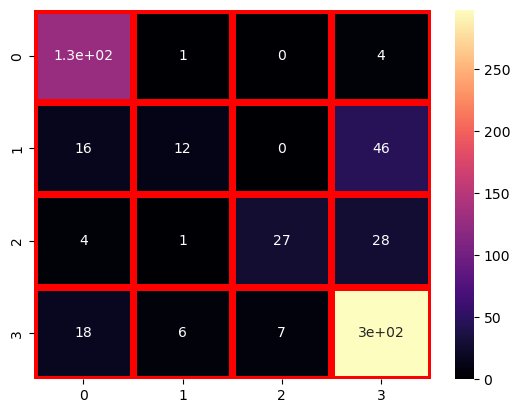

In [ ]:
sns.heatmap(lr_conf, annot=True,linecolor='red',linewidths=5,cmap='magma')

In [ ]:
compare=[]

In [ ]:
compare.append(accuracy_score(y_test,lr_predict))
print(accuracy_score(y_test,lr_predict))

0.7802013422818792


In [ ]:
print(classification_report(y_test,lr_predict))

              precision    recall  f1-score   support

       heavy       0.77      0.96      0.86       133
        high       0.60      0.16      0.26        74
         low       0.79      0.45      0.57        60
      normal       0.79      0.91      0.85       329

    accuracy                           0.78       596
   macro avg       0.74      0.62      0.63       596
weighted avg       0.76      0.78      0.75       596



# Precision Recall Curve

0.9997630698412086

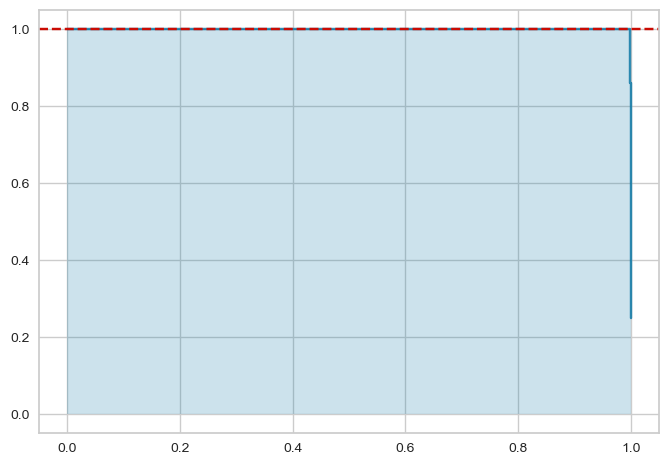

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
from yellowbrick.classifier import PrecisionRecallCurve
gb_clf_pr = PrecisionRecallCurve(GradientBoostingClassifier(n_estimators=20))
gb_clf_pr.fit(X_train,y_train)
gb_clf_pr.score(X_test,y_test)


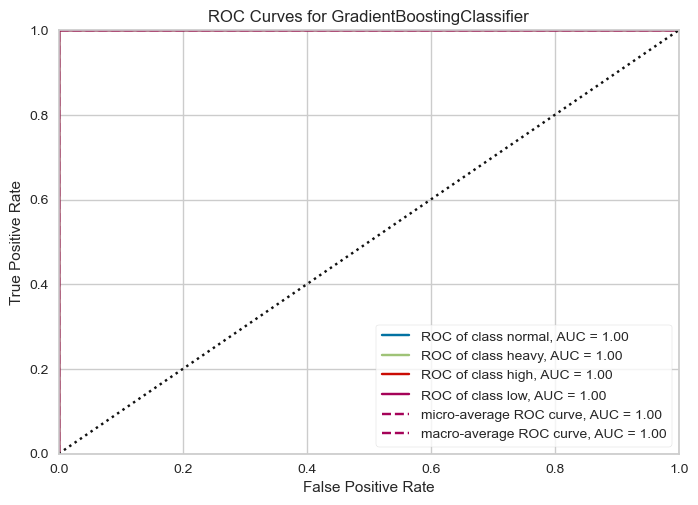

ROCAUC(ax=<Axes: title={'center': 'ROC Curves for GradientBoostingClassifier'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>,
       classes=array(['normal', 'heavy', 'high', 'low'], dtype=object),
       estimator=GradientBoostingClassifier(n_estimators=20))

In [ ]:
from yellowbrick.classifier import ROCAUC
from yellowbrick.classifier.rocauc import roc_auc

model=GradientBoostingClassifier(n_estimators=20)
roc_auc(model,X_train,y_train, X_test=X_test,y_test=y_test,classes=y_train.unique())

# K NN

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
scaler=StandardScaler()

In [ ]:
scaler.fit(df.drop('Traffic Situation',axis=1))

StandardScaler()

In [ ]:
scaled_features = scaler.transform(df.drop('Traffic Situation',axis=1))

In [ ]:
df_feat=pd.DataFrame(scaled_features,columns =df.columns[:-1])

In [ ]:
df_feat.head()

,Date,Day of the week,CarCount,BikeCount,BusCount,TruckCount,Total,Traffic Situation,iST,HH,MM
0,-0.67082,0.900187,-0.822297,-1.161302,-0.786604,-1.068183,-1.249880,-1.0,1.593255,-1.341641,0.0
1,-0.67082,0.900187,-0.429653,-1.161302,-0.856341,-1.162505,-0.984013,-1.0,1.593255,-0.447214,0.0
2,-0.67082,0.900187,-0.495094,-1.161302,-0.856341,-0.879540,-0.984013,-1.0,1.593255,0.447214,0.0
3,-0.67082,0.900187,-0.386026,-1.161302,-0.926078,-0.973862,-0.934163,-1.0,1.593255,1.341641,0.0
4,-0.67082,0.900187,-0.255144,-0.694207,-0.019496,0.063673,-0.335963,-1.0,-1.593255,-1.341641,0.0


In [ ]:
X_train_k, X_test_k, y_train_k, y_test_k = train_test_split(scaled_features, df['Traffic Situation'], test_size=0.2, random_state=101)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
error_rate=[]
for i in range(1,40):
    knn=KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train_k,y_train_k)
    predic_k=knn.predict(X_test_k)
    error_rate.append(np.mean(predic_k != y_test_k))

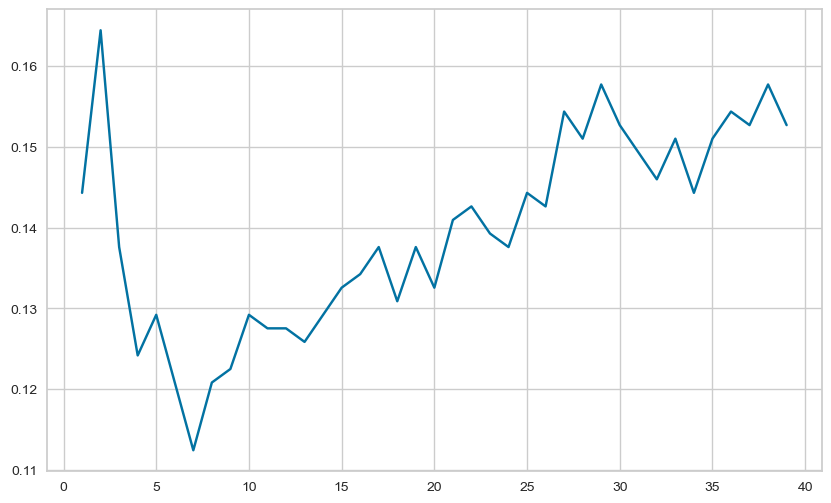

In [ ]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate)

In [ ]:
knn_k=KNeighborsClassifier(n_neighbors=6)

In [ ]:
knn_k.fit(X_train_k,y_train_k)

KNeighborsClassifier(n_neighbors=6)

In [ ]:
predict_knn=knn_k.predict(X_test_k)

In [ ]:
compare.append(accuracy_score(y_test_k,predict_knn))
print(accuracy_score(y_test_k,predict_knn))

0.8791946308724832


In [ ]:
knn_conf=confusion_matrix(y_test_k,predict_knn)
knn_conf

array([[129,   3,   0,   1],
       [ 16,  52,   0,   6],
       [  0,   0,  42,  18],
       [  7,   6,  15, 301]], dtype=int64)

<Axes: >

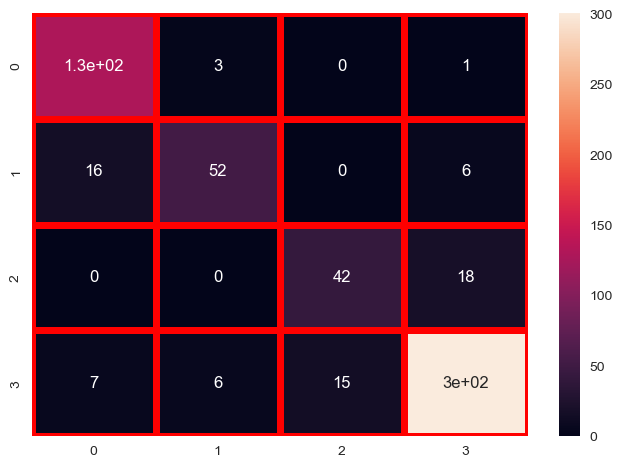

In [ ]:
sns.heatmap(knn_conf, annot=True,linecolor='red',linewidths=5)

In [ ]:
print(classification_report(y_test_k,predict_knn))

              precision    recall  f1-score   support

       heavy       0.85      0.97      0.91       133
        high       0.85      0.70      0.77        74
         low       0.74      0.70      0.72        60
      normal       0.92      0.91      0.92       329

    accuracy                           0.88       596
   macro avg       0.84      0.82      0.83       596
weighted avg       0.88      0.88      0.88       596



# Random Forest Classifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
rfc=RandomForestClassifier()

In [ ]:
rfc.fit(X_train,y_train)

RandomForestClassifier()

In [ ]:
rfc_predic=rfc.predict(X_test)

In [ ]:
compare.append(accuracy_score(y_test,rfc_predic))
print(accuracy_score(y_test,rfc_predic))

0.9983221476510067


In [ ]:
rfc_conf=confusion_matrix(y_test,rfc_predic)
rfc_conf

array([[133,   0,   0,   0],
       [  0,  74,   0,   0],
       [  0,   0,  60,   0],
       [  1,   0,   0, 328]], dtype=int64)

<Axes: >

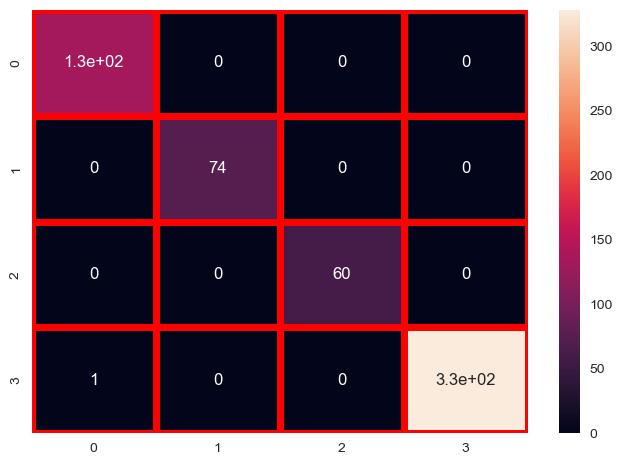

In [ ]:
sns.heatmap(rfc_conf, annot=True,linecolor='red',linewidths=5)

In [ ]:
print(classification_report(y_test,rfc_predic))

              precision    recall  f1-score   support

       heavy       0.99      1.00      1.00       133
        high       1.00      1.00      1.00        74
         low       1.00      1.00      1.00        60
      normal       1.00      1.00      1.00       329

    accuracy                           1.00       596
   macro avg       1.00      1.00      1.00       596
weighted avg       1.00      1.00      1.00       596



In [ ]:
from sklearn import tree

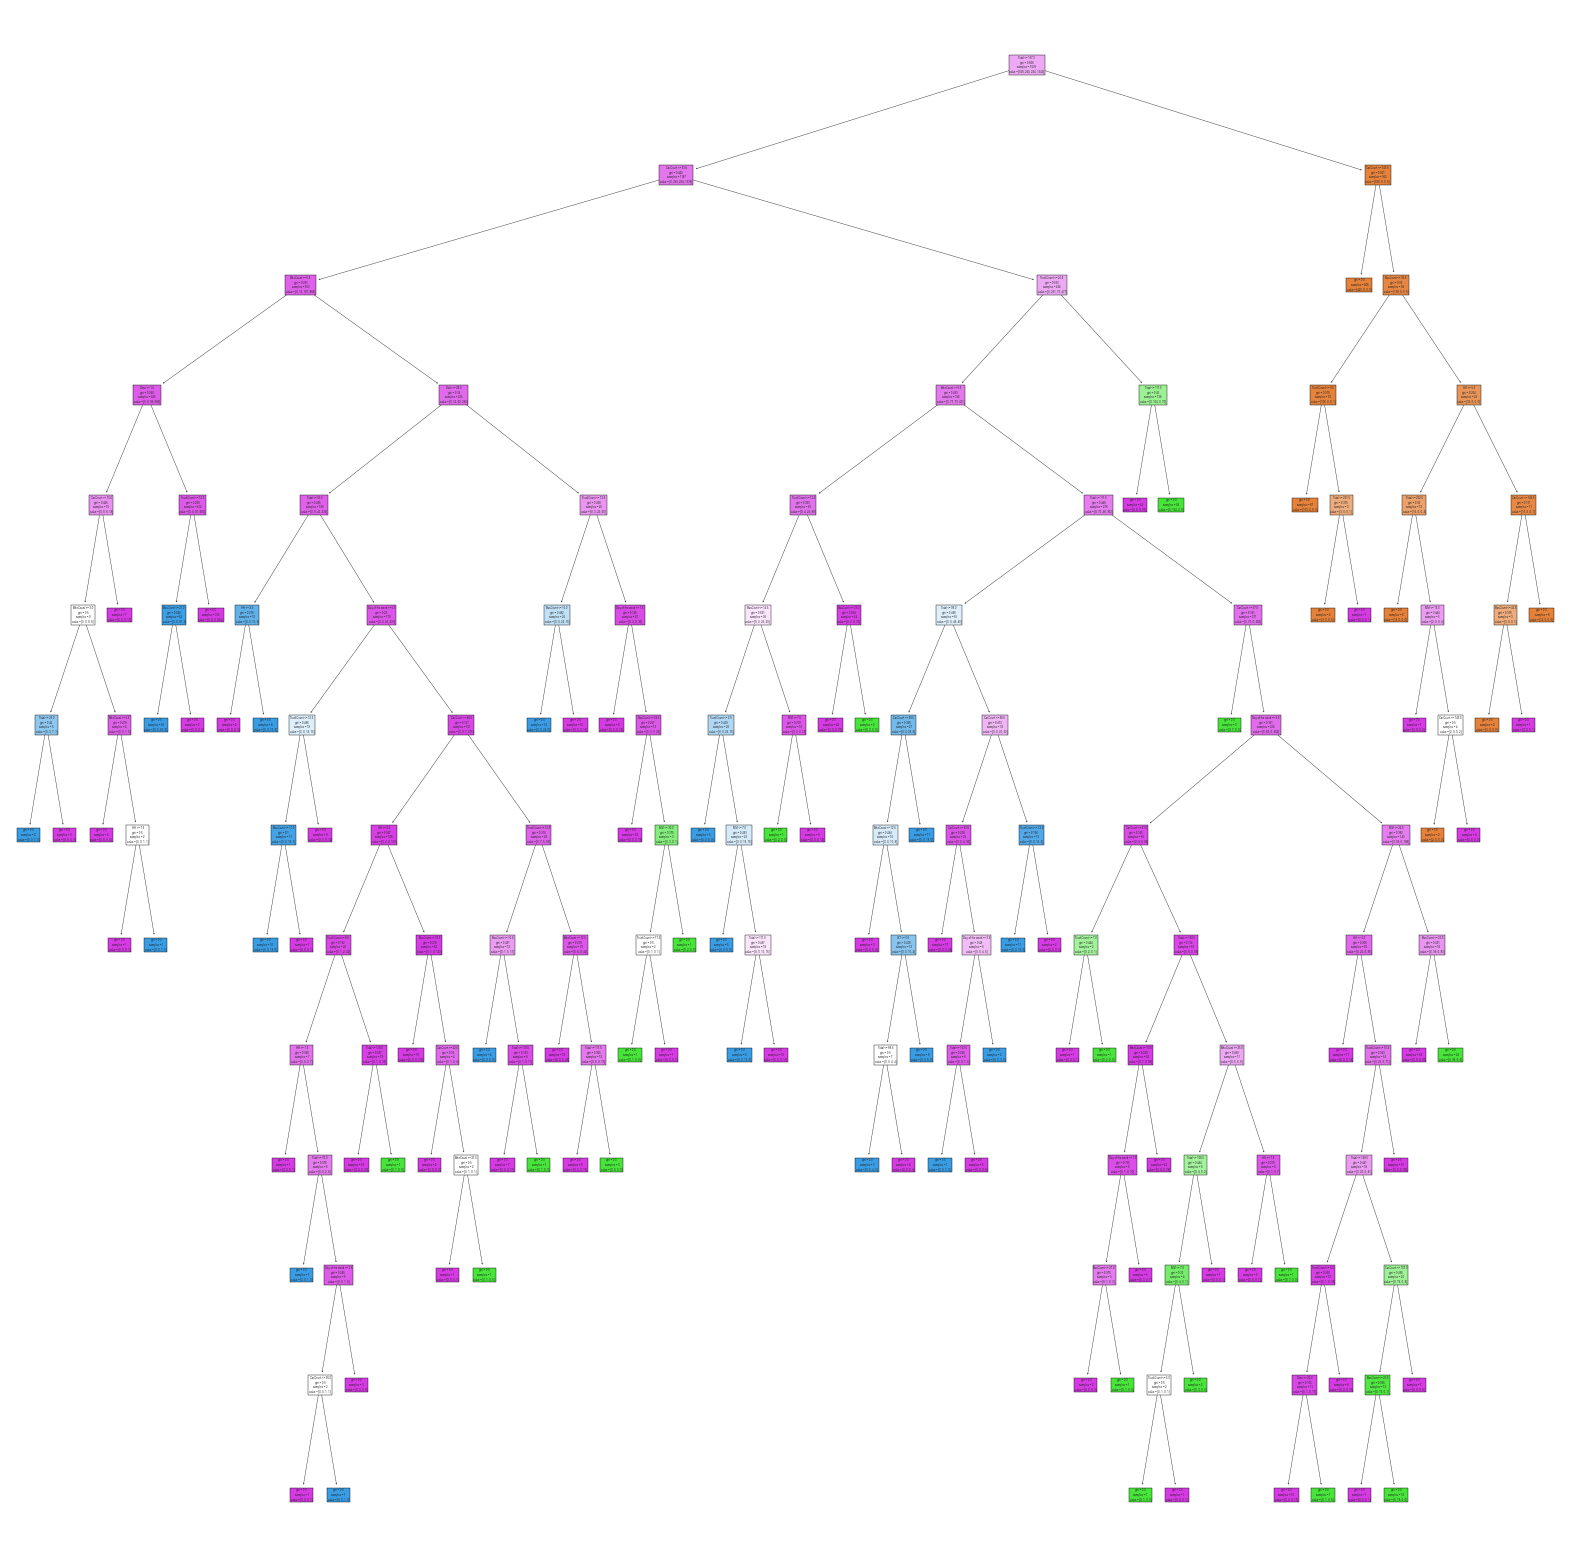

In [ ]:
feature_names = X.columns.tolist()

# Plot the tree
plt.figure(figsize=(20, 20))
_ = tree.plot_tree(rfc.estimators_[0], feature_names=feature_names, filled=True)

# Support Vector Machine

In [ ]:
from sklearn.svm import SVC

In [ ]:
svvc=SVC(C=100,gamma=0.002)

In [ ]:
svvc.fit(X_train,y_train)

SVC(C=100, gamma=0.002)

In [ ]:
predi_svvc=svvc.predict(X_test)

In [ ]:
compare.append(accuracy_score(y_test,predi_svvc))
print(accuracy_score(y_test,predi_svvc))

0.9714765100671141


In [ ]:
svc_conf=confusion_matrix(y_test,predi_svvc)
svc_conf

array([[129,   0,   0,   4],
       [  2,  69,   0,   3],
       [  0,   0,  57,   3],
       [  1,   2,   2, 324]], dtype=int64)

<Axes: >

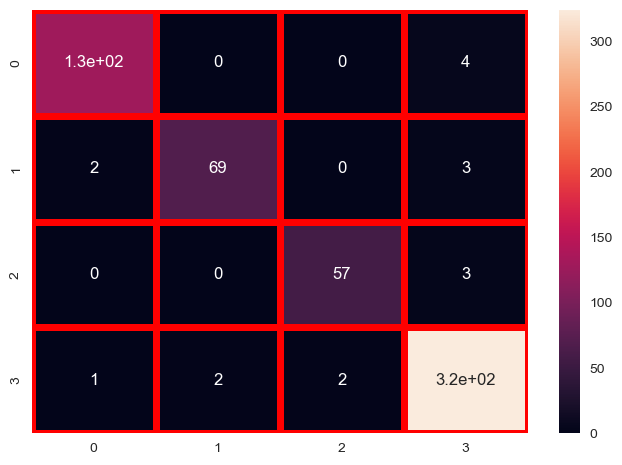

In [ ]:
sns.heatmap(svc_conf, annot=True,linecolor='red',linewidths=5)

In [ ]:
print(classification_report(y_test,predi_svvc))

              precision    recall  f1-score   support

       heavy       0.98      0.97      0.97       133
        high       0.97      0.93      0.95        74
         low       0.97      0.95      0.96        60
      normal       0.97      0.98      0.98       329

    accuracy                           0.97       596
   macro avg       0.97      0.96      0.97       596
weighted avg       0.97      0.97      0.97       596



In [ ]:
Dff = pd.DataFrame(compare)

In [ ]:
Dff

,0
0,0.780201
1,0.879195
2,1.000000
3,1.000000
4,0.998322
5,0.998322
6,0.971477


In [ ]:
Dff.drop_duplicates(keep='first',inplace=True)

In [ ]:
Dff= Dff[Dff < 1]


In [ ]:
Dff.dropna(inplace=True)

In [ ]:
Dff['Algo'] = ['LR','Knn','RF','SVM']
Dff.rename(columns = {0:'Accuracy'}, inplace = True)

In [ ]:
Dff

,Accuracy,Algo
0,0.780201,LR
1,0.879195,Knn
4,0.998322,RF
6,0.971477,SVM


<Axes: xlabel='Algo', ylabel='Accuracy'>

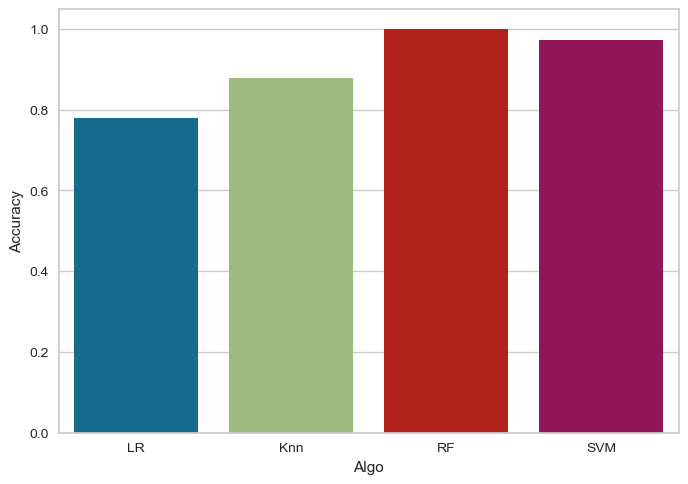

In [ ]:
sns.barplot(x='Algo',y='Accuracy',data=Dff)